In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras import activations
from tensorflow.keras import initializers

# Create model
model = Sequential()

# Hidden layer
model.add(Dense(units=16, activation=activations.relu, input_dim=28 * 28,
                kernel_initializer=initializers.VarianceScaling(scale=2.0, seed=0)))

# Output layer
model.add(Dense(units=10, activation=activations.softmax,
                kernel_initializer=initializers.VarianceScaling(scale=1.0, seed=0)))

# Print network summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                12560     
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras import optimizers

# Define loss function, optimizer and metrics to track during training
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [34]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Define loss function, optimizer, and metrics to track during training
model.compile(
    optimizer="sgd",                         # .. or optimizers.SGD(lr=0.01)
    loss="sparse_categorical_crossentropy",  # .. or losses.sparse_categorical_crossentropy
    metrics=["acc"],                         # .. or metrics.sparse_categorical_accuracy
)

In [35]:
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test: (10000, 28, 28) (10000,)


In [38]:
from sklearn.preprocessing import StandardScaler

# Rescale train and validation data
scaler = StandardScaler()
#X_train_preprocessed = scaler.fit_transform(X_train.reshape([-1, 784]).astype(float))
#X_test_preprocessed = scaler.transform(X_test.reshape([-1, 784]).astype(float))

#X_train_preprocessed = (X_train.reshape([-1, 784]).astype(float)-127.5)/127.5
#X_test_preprocessed = (X_test.reshape([-1, 784]).astype(float)-127.5)/127.5

X_train_preprocessed =  X_train.reshape([-1, 784]).astype(float)
X_test_preprocessed =  X_test.reshape([-1, 784]).astype(float)

print("Train:", X_train_preprocessed.shape)
print("Test:", X_test_preprocessed.shape)

Train: (60000, 784)
Test: (10000, 784)


In [39]:
# Fit model
history = model.fit(
    x=X_train_preprocessed,
    y=y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=12,
    shuffle=True,  # Shuffle training samples
)

Epoch 1/12
1500/1500 [==============================] - 3s 2ms/step - loss: 3.1776 - acc: 0.1142 - val_loss: 2.3016 - val_acc: 0.1062
Epoch 2/12
1500/1500 [==============================] - 2s 2ms/step - loss: 2.3009 - acc: 0.1141 - val_loss: 2.3019 - val_acc: 0.1061
Epoch 3/12
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3010 - acc: 0.1140 - val_loss: 2.3019 - val_acc: 0.1061
Epoch 4/12
1500/1500 [==============================] - 2s 2ms/step - loss: 2.3017 - acc: 0.1149 - val_loss: 2.2862 - val_acc: 0.1142
Epoch 5/12
1500/1500 [==============================] - 2s 1ms/step - loss: 2.2789 - acc: 0.1299 - val_loss: 2.2882 - val_acc: 0.1120
Epoch 6/12
1500/1500 [==============================] - 2s 1ms/step - loss: 2.2828 - acc: 0.1291 - val_loss: 2.2862 - val_acc: 0.1130
Epoch 7/12
1500/1500 [==============================] - 2s 1ms/step - loss: 2.2546 - acc: 0.1395 - val_loss: 2.2048 - val_acc: 0.1513
Epoch 8/12
1500/1500 [==============================] - 2s 1ms

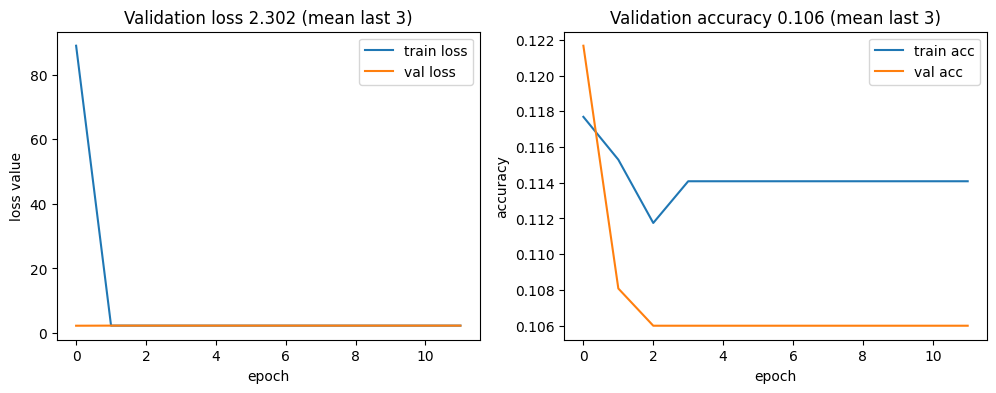

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.show()

In [37]:
(test_loss, test_accuracy) = model.evaluate(X_test_preprocessed, y_test, batch_size=32)

print("Test loss: {:.2f}".format(test_loss))
print("Test accuracy: {:.2f}%".format(100 * test_accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 133.2195 - acc: 0.1291
Test loss: 133.22
Test accuracy: 12.91%


In [40]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K

In [41]:
K.clear_session()  # Reset state generated by Keras (avoid clutter)

In [42]:
model = keras.applications.Xception(weights="imagenet")

91897856/91884032 [==============================] - 42s 0us/step


In [43]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          